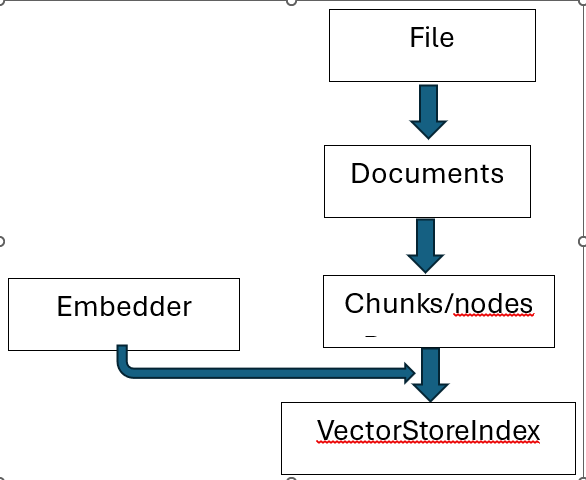

In LlamaIndex, **documents** represent entire data sources (like PDFs or API outputs), while **nodes** represent smaller, chunked pieces of those documents, containing metadata and relationships to other nodes. Here's a more detailed explanation:    
### Documents:

>    Purpose: Documents are the foundational units representing your data sources.

>Examples: PDFs, API outputs, data retrieved from a database, or even images.      

>**LlamaIndex's Role**: LlamaIndex provides data connectors to ingest various data formats into documents.     

>**Metadata**: Documents can store metadata, which is inherited by the nodes derived from them.    

>**Usage**: You can create documents from various sources and then use them to build indexes.        

###Nodes:

>    Purpose:    
    Nodes represent smaller, manageable chunks of text or other data from a document, suitable for LLM processing.

>**Attributes**:     
Nodes contain metadata, relationship information with other nodes, and metadata inherited from the document they came from.     
>**Creation**:         
You can either construct nodes directly or parse source documents into nodes using LlamaIndex's NodeParser classes.     
>**Usage**:          
Nodes are the building blocks of indexes, allowing for efficient retrieval and processing of data for applications like question answering and chatbots.      
>**Example**:    
A node could be a single paragraph from a PDF, or a specific section of a database record.


In [4]:
!pip install llama_index -q

In [7]:
# 1.0
from llama_index.core import Document, VectorStoreIndex

#1.1
text_list = ["text1", "text2"]
documents = [Document(text=t) for t in text_list]

documents

[Document(id_='3d6ac1c7-72f5-4d1b-80c6-e90d7ccf6306', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='text1', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}'),
 Document(id_='889e1eea-d7c7-4cfc-8aae-68f2f370da43', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='text2', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}')]

### VectorStoreIndex

`VectorStoreIndex` is an indexing structure designed to turn raw text data into vector embeddings using LlamaIndex's seamless integration with OpenAI’s embedding models.    

`VectorStoreIndex.from_documents` transforms documents to nodes and nodes to vectors using default OpenAI embeddings.     

Vector stores accept a list of Node objects and build an index from them.

We override the default embeddings, as:

In [18]:
%pip install fastembed -q
%pip install llama-index-embeddings-fastembed -q

In [19]:
from llama_index.embeddings.fastembed import FastEmbedEmbedding
from llama_index.core import Settings

In [20]:
Settings.embed_model = FastEmbedEmbedding(model_name="BAAI/bge-base-en-v1.5")


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model_optimized.onnx:   0%|          | 0.00/218M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

In [22]:
# Use above documents to create embeddings (index)
# Embeddings are stored in memory

index = VectorStoreIndex.from_documents(documents)


In [28]:
index.vector_store

SimpleVectorStore(stores_text=False, is_embedding_query=True, data=SimpleVectorStoreData(embedding_dict={'77114dc7-b71a-4109-ac44-f9bf85e6206b': [-0.005573860835283995, 0.03835131227970123, -0.012337337248027325, 0.008807881735265255, 0.06586215645074844, 0.009138768538832664, 0.01919141411781311, 0.024091683328151703, -0.030504578724503517, -0.046922847628593445, -0.02831442467868328, 0.036649610847234726, -0.08962295204401016, -0.043424904346466064, -0.041187483817338943, 0.05546287074685097, 0.06078856438398361, -0.004049419891089201, 0.0012398393591865897, -0.01629221811890602, 0.04481147602200508, 0.06762688606977463, 0.05029473826289177, 0.04058873653411865, 0.03813072293996811, 0.0003237467899452895, 0.03141845390200615, -0.008823638781905174, -0.06126125901937485, 0.018403587862849236, 0.07040002942085266, 0.030220961198210716, -0.006487737875431776, -0.014582637697458267, 0.016623103991150856, 0.012833666987717152, 0.025509769096970558, -0.018403587862849236, 0.052815780043601

When managing your index directly, you will want to deal with data sources that change over time. `Index` classes have *insertion, deletion, update*, and *refresh* operations.

### Vector stores

LlamaIndex supports dozens of vector stores to store indexes. You can specify which one to use by passing in a `StorageContext`, on which in turn you specify the vector_store argument, as in this example using Qdrant.    

First, create a vector store using the specifc vector database API:

Configure the specific vector store to use.

<pre>
vector_store = QdrantVectorStore(    
                                  collection_name = 'llama2',             # ~/databases/qdrant/storage/collections/
                                  client=client,
                                  aclient=aclient,
                                  enable_hybrid=True,
                                  batch_size=20,
                               )</pre>

### StorageContext

The storage context container is a utility container for storing nodes (chunks of documents), indices (node ids), and vectors. It contains the index for each:

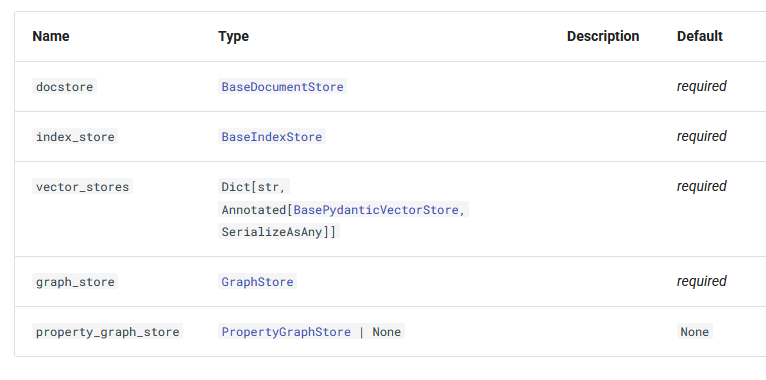

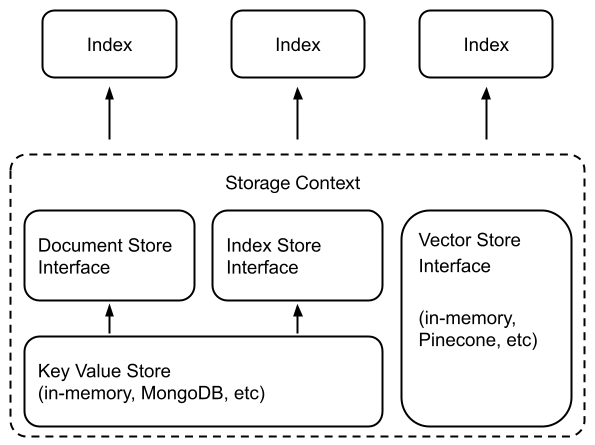

Define a `StorageContext` to have a uniform interface for llamaindex classes:

<pre>
storage_context = StorageContext.from_defaults(
                                               vector_store=vector_store
                                               )
</pre>

Finally build index:

<pre>
index = VectorStoreIndex.from_documents(
                                        documents,
                                        storage_context = storage_context
                                       )
</pre>

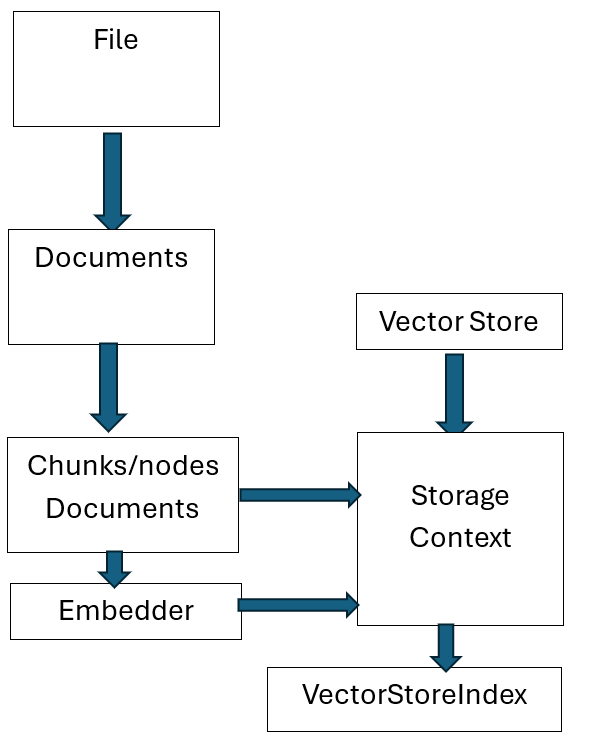

## Other indexes in llamaindex

Llamaindex has a number of indexes besides `VectorStoreIndex`. Here is a list. See this [article](https://howaibuildthis.substack.com/p/llamaindex-how-to-use-index-correctly).

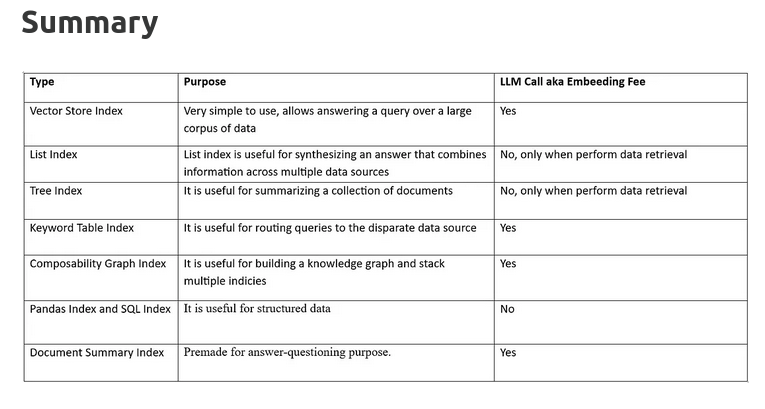

#############